# IMPORT LIBRARY

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split






# LOAD DATASET

In [56]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/machine_learning/crime_new.csv'
data = pd.read_csv(dataset_path)



# READ DATASET

In [58]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [59]:
data.info

<bound method DataFrame.info of                                                    TYPE  YEAR  MONTH  DAY  \
0                                           Other Theft  2003      5   12   
1                                           Other Theft  2003      5    7   
2                                           Other Theft  2003      4   23   
3                                           Other Theft  2003      4   20   
4                                           Other Theft  2003      4   12   
...                                                 ...   ...    ...  ...   
1541  Vehicle Collision or Pedestrian Struck (with I...  2003      3   22   
1542  Vehicle Collision or Pedestrian Struck (with I...  2003      9   20   
1543                  Break and Enter Residential/Other  2003      7    4   
1544                           Offence Against a Person  2003      2    3   
1545                  Break and Enter Residential/Other  2003     12   14   

      HOUR  MINUTE               HUNDRED_BLOCK              NEIGHBOURHOOD  \
0     16.0    15.0            9XX TERMINAL AVE                 Strathcona   
1     15.0    20.0            9XX TERMINAL AVE                 Strathcona   
2     16.0    40.0            9XX TERMINAL AVE                 Strathcona   
3     11.0    15.0            9XX TERMINAL AVE                 Strathcona   
4     17.0    45.0            9XX TERMINAL AVE                 Strathcona   
...    ...     ...                         ...                        ...   
1541   4.0    35.0   COLUMBIA ST / E PENDER ST  Central Business District   
1542   8.0    14.0  COLUMBIA ST / E CORDOVA ST  Central Business District   
1543  13.0    30.0              19XX ADANAC ST         Grandview-Woodland   
1544   NaN     NaN   OFFSET TO PROTECT PRIVACY                        NaN   
1545  12.0     0.0             67XX SELKIRK ST                   Oakridge   

              X           Y   Latitude   Longitude  
0     493906.50  5457452.47  49.269802 -123.083763  
1     493906.50  5457452.47  49.269802 -123.083763  
2     493906.50  5457452.47  49.269802 -123.083763  
3     493906.50  5457452.47  49.269802 -123.083763  
4     493906.50  5457452.47  49.269802 -123.083763  
...         ...         ...        ...         ...  
1541  492561.00  5458637.00  49.280442 -123.102281  
1542  492565.00  5458848.00  49.282340 -123.102230  
1543  495331.82  5458303.24  49.277467 -123.064180  
1544       0.00        0.00   0.000000    0.000000  
1545  490292.33  5452422.73  49.224512 -123.133323  

[1546 rows x 12 columns]>

In [60]:
data.shape

(1546, 12)

In [61]:
data.isnull().sum()

TYPE               0
YEAR               0
MONTH              0
DAY                0
HOUR             121
MINUTE           121
HUNDRED_BLOCK      0
NEIGHBOURHOOD    121
X                  0
Y                  0
Latitude           0
Longitude          0
dtype: int64

# drop missing value columns

In [62]:
columns_to_drop = ["HOUR", "MINUTE", "NEIGHBOURHOOD"]
data.drop(columns=columns_to_drop, inplace=True)

In [63]:
data.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HUNDRED_BLOCK    0
X                0
Y                0
Latitude         0
Longitude        0
dtype: int64

In [64]:
data.shape

(1546, 9)

In [65]:
data.head()

,TYPE,YEAR,MONTH,DAY,HUNDRED_BLOCK,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,9XX TERMINAL AVE,493906.5,5457452.47,49.269802,-123.083763


# Label encoding

In [66]:
# Encode categorical features
label_encoder = LabelEncoder()
data["HUNDRED_BLOCK"] = label_encoder.fit_transform(data["HUNDRED_BLOCK"])

In [67]:
# Extract features (X) and target variable (y)
X = data.drop(columns=["TYPE"])
y = data["TYPE"]

In [68]:
print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())

Features (X):
   YEAR  MONTH  DAY  HUNDRED_BLOCK         X           Y   Latitude  \
0  2003      5   12            307  493906.5  5457452.47  49.269802   
1  2003      5    7            307  493906.5  5457452.47  49.269802   
2  2003      4   23            307  493906.5  5457452.47  49.269802   
3  2003      4   20            307  493906.5  5457452.47  49.269802   
4  2003      4   12            307  493906.5  5457452.47  49.269802   

    Longitude  
0 -123.083763  
1 -123.083763  
2 -123.083763  
3 -123.083763  
4 -123.083763  

Target Variable (y):
0    Other Theft
1    Other Theft
2    Other Theft
3    Other Theft
4    Other Theft
Name: TYPE, dtype: object


# Normalization

In [69]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# classification algorithm
# logistic regression

In [71]:
# Train a logistic regression model with increased max_iter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.69


# Random forest

In [73]:
# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [74]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")


Random Forest Accuracy: 0.98


# Gradient boosting

In [75]:
# Train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [76]:
# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Print the accuracy
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.2f}")

Gradient Boosting Classifier Accuracy: 0.97


# CLUSTERING

# DBCAN

In [77]:
# Perform density-based clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


# K-Mean

In [78]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


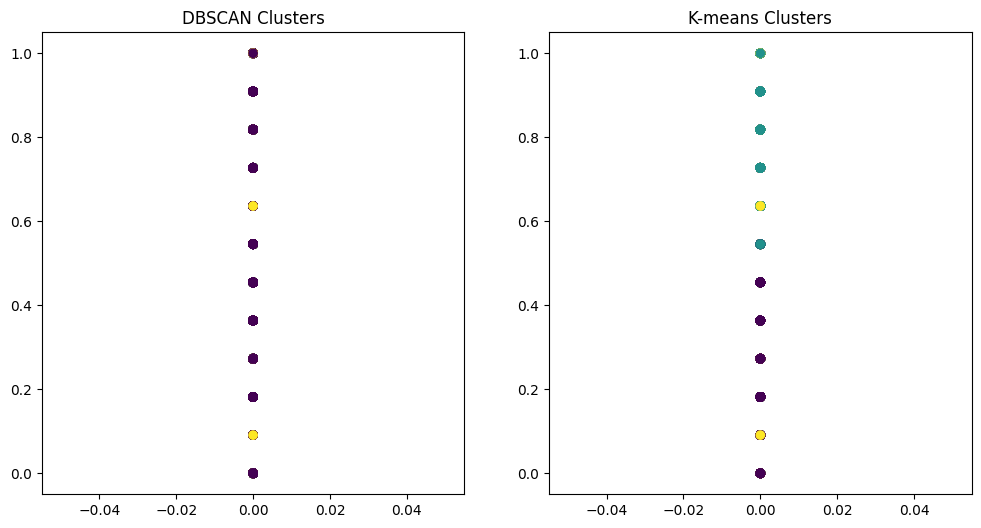

In [79]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap="viridis")
plt.title("DBSCAN Clusters")
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap="viridis")
plt.title("K-means Clusters")
plt.show()



# Ensemble Classifiers/Deep Learning Techniques